In [9]:
from Bio.PDB import PDBParser, PPBuilder
from Bio import pairwise2
import os
import warnings
from Bio.PDB.PDBExceptions import PDBConstructionWarning


warnings.simplefilter('ignore', PDBConstructionWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="Bio.PDB.DSSP")
def extract_sequence(pdb_file_path):
    parser = PDBParser()
    structure_id = os.path.splitext(os.path.basename(pdb_file_path))[0]
    structure = parser.get_structure(structure_id, pdb_file_path)
    ppb = PPBuilder()
    sequences = []
    for model in structure:
        for chain in model:
            for pp in ppb.build_peptides(chain):
                sequences.append(str(pp.get_sequence()))
    return sequences

def compare_sequences(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2)
    top_alignment = alignments[0]
    score = top_alignment.score / max(len(seq1), len(seq2))  # Normalized score
    return score

def extract_matching_string(filename):
    base_name = os.path.splitext(filename)[0]
    return base_name.split('_')[0]


def find_matching_files(source_file, target_folder):
    matching_string = extract_matching_string(os.path.basename(source_file))
    return [os.path.join(target_folder, f) for f in os.listdir(target_folder) if matching_string in f]



folder1 = '/data_0/pdb_sort/sort_3'
folder2 = '/data_0/msa_generation/gen3/'
output_file_path = '/home/fanminzhi/seq_sim_esm_3.txt'

with open(output_file_path, 'w') as output_file:
    for file1 in os.listdir(folder1):
        if file1.endswith(".pdb"):
            file1_path = os.path.join(folder1, file1)
            matching_files = find_matching_files(file1_path, folder2)

            if not matching_files:
                print(f"No matching files found for {file1}")

            sequence1 = extract_sequence(file1_path)[0]  

            if not sequence1:
                print(f"No sequence extracted from {file1}")

            for file2 in matching_files:
                sequence2 = extract_sequence(file2)[0]  

                if not sequence2:
                    print(f"No sequence extracted from {file2}")

                similarity_score = compare_sequences(sequence1, sequence2)
                output_file.write(f"Similarity between {file1} and {os.path.basename(file2)}: {similarity_score}\n")

print(f"Similarity scores have been written to {output_file_path}")

No matching files found for MGYP001194873039.pdb
No matching files found for MGYP003663742447.pdb
No matching files found for MGYP003650415482.pdb
No matching files found for MGYP001138955535.pdb
No matching files found for MGYP001301790578.pdb
No matching files found for MGYP001356773001.pdb
No matching files found for MGYP003624337898.pdb
No matching files found for MGYP003574861555.pdb
No matching files found for MGYP003307424934.pdb
No matching files found for MGYP001116976399.pdb
No matching files found for MGYP003593655090.pdb
No matching files found for MGYP003484698215.pdb
No matching files found for MGYP002620955740.pdb
No matching files found for MGYP001984668359.pdb
No matching files found for MGYP001120872378.pdb
No matching files found for MGYP001423323390.pdb
No matching files found for MGYP001438113913.pdb
No matching files found for MGYP001216143592.pdb
No matching files found for MGYP002568237459.pdb
No matching files found for MGYP002393581698.pdb
No matching files fo

In [26]:
import numpy as np
from Bio.PDB import PDBParser, Superimposer
def calculate_rmsd(file1, file2):
    parser = PDBParser()

    # Parse the structures
    structure1 = parser.get_structure("structure1", file1)
    structure2 = parser.get_structure("structure2", file2)

    # Extract the first model
    model1 = structure1[0]
    model2 = structure2[0]

    chain1 = next(model1.get_chains())
    chain2 = next(model2.get_chains())

    atoms1 = [atom for atom in chain1.get_atoms() if atom.get_name() == "CA"]
    atoms2 = [atom for atom in chain2.get_atoms() if atom.get_name() == "CA"]

    if len(atoms1) != len(atoms2):
        raise ValueError("Chains don't have the same number of CA atoms")

    sup = Superimposer()
    sup.set_atoms(atoms1, atoms2)
    sup.apply(model2.get_atoms())

    # Return the RMSD
    return sup.rms

def compare_rmsd_in_folders(source_folder, target_folder, results_file):
    with open(results_file, 'w') as file:
        for source_filename in os.listdir(source_folder):
            if source_filename.endswith(".pdb"):
                source_file_path = os.path.join(source_folder, source_filename)
                matching_files = find_matching_files(source_file_path, target_folder)

                for target_file in matching_files:
                    try:
                        rmsd = calculate_rmsd(source_file_path, target_file)
                        file.write(f"RMSD between {source_file_path} and {target_file}: {rmsd}\n")
                    except Exception as e:
                        print(f"Error processing {source_file_path} and {target_file}: {e}")

source_file = '/data_0/pdb_sort/beta' 
target_folder = '/data_0/output_chroma/beta/4th_round'  
results_file = '../rmsd_3.txt'
compare_rmsd_in_folders(source_file, target_folder,results_file)




Error processing /data_0/pdb_sort/beta/1PO0.pdb and /data_0/output_chroma/beta/4th_round/1PO0_redesign_1_redesign_2_redesign_3_redesign.pdb: Chains don't have the same number of CA atoms
Error processing /data_0/pdb_sort/beta/6Y47.pdb and /data_0/output_chroma/beta/4th_round/6Y47_redesign_1_redesign_2_redesign_3_redesign.pdb: Chains don't have the same number of CA atoms
Error processing /data_0/pdb_sort/beta/1W0O.pdb and /data_0/output_chroma/beta/4th_round/1W0O_redesign_1_redesign_2_redesign_3_redesign.pdb: Chains don't have the same number of CA atoms
Error processing /data_0/pdb_sort/beta/4NSX.pdb and /data_0/output_chroma/beta/4th_round/4NSX_redesign_1_redesign_2_redesign_3_redesign.pdb: Chains don't have the same number of CA atoms
Error processing /data_0/pdb_sort/beta/6EKU.pdb and /data_0/output_chroma/beta/4th_round/6EKU_redesign_1_redesign_2_redesign_3_redesign.pdb: Chains don't have the same number of CA atoms
Error processing /data_0/pdb_sort/beta/6EKS.pdb and /data_0/outpu

/tmp/ipykernel_81690/3773800716.py:33: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores, shade=True,label='round 1',color='#D2B7D2')
/tmp/ipykernel_81690/3773800716.py:34: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores_2, shade=True,label='round 3',color='#7291C3')
/tmp/ipykernel_81690/3773800716.py:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scores_3, shade=True,label='round 2',color='#F1D39A')
/tmp/ipykernel_81690/3773800716.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(scor

Text(0, 0.5, 'Density')

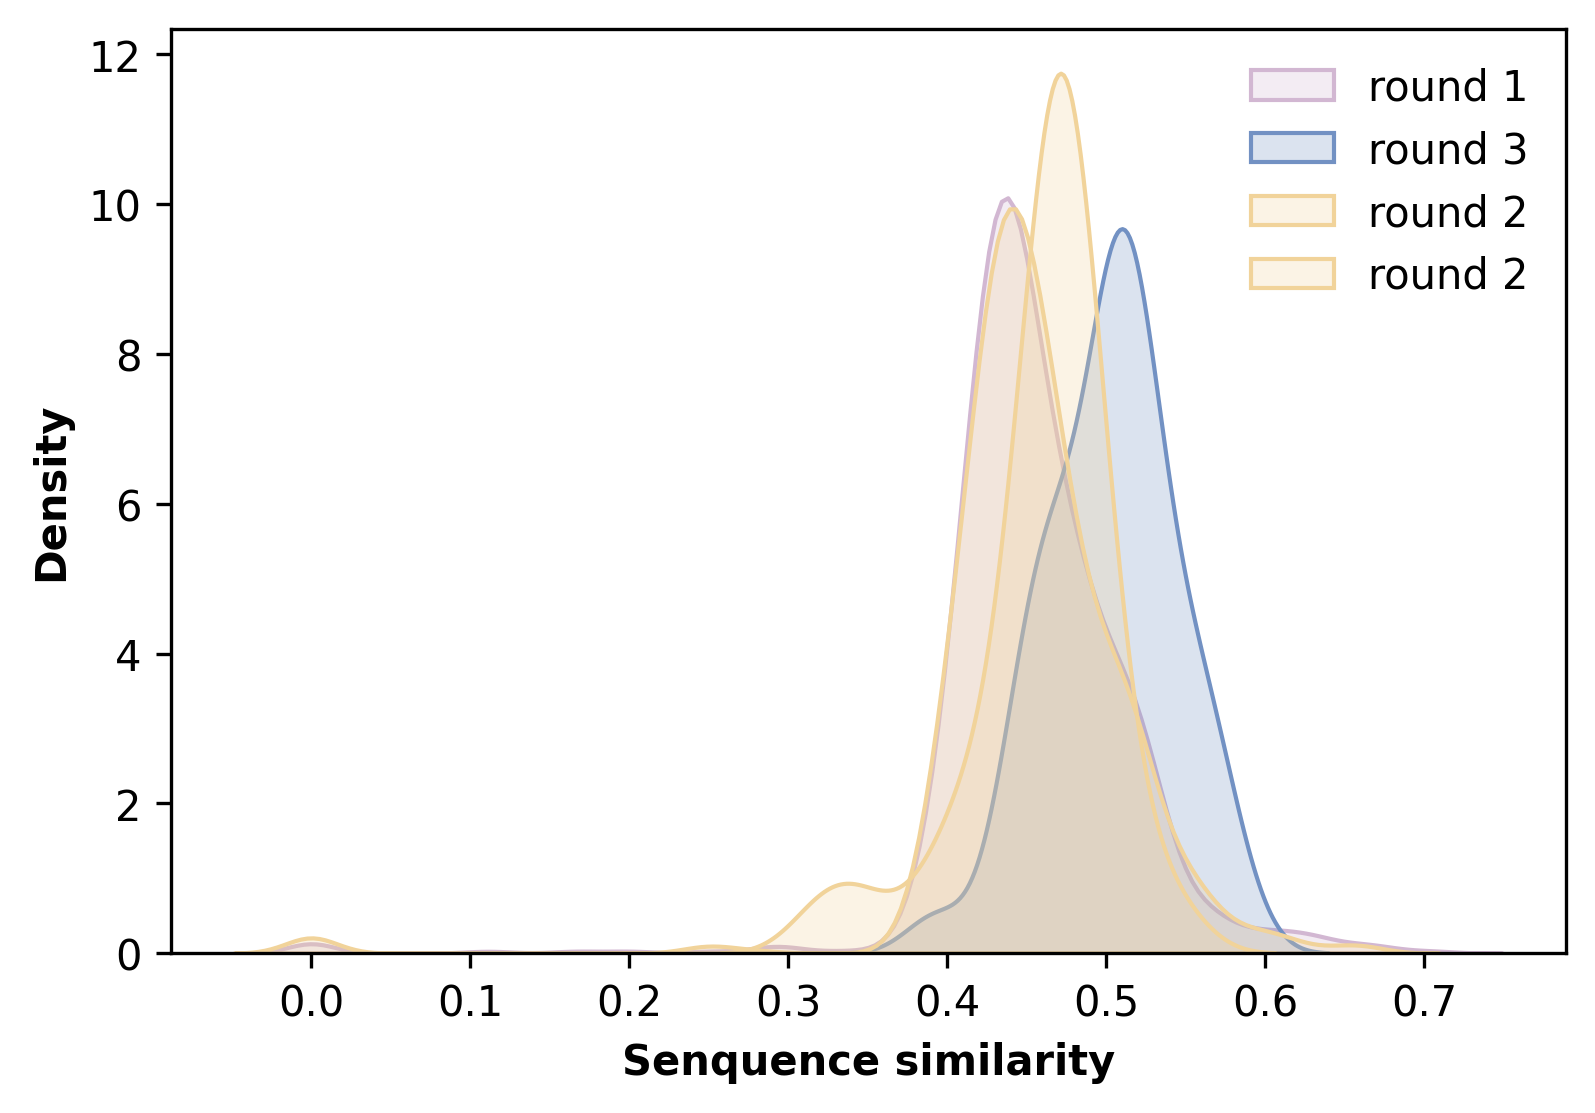

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def extract_similarity_scores(file_path):
    scores = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Check if the line is not empty
                parts = line.split(':')
                if len(parts) == 2:
                    score = float(parts[1].strip())
                    scores.append(score)
    return scores


def plot_similarity_scores(scores):
    plt.hist(scores, bins=20, edgecolor='white')
    plt.title('Distribution of Similarity Scores')
    plt.xlabel('Similarity Score')
    plt.ylabel('Frequency')
    plt.show()

# Example usage
file_path = '../seq_sim_esm_2.txt'
file_path_2 ='../output_similarity_scores_2.txt'
file_path_3 ='../seq_sim_esm.txt' 
file_path_4 = '../seq_sim_pdb.txt'
file_path_5 = '../seq_sim_esm_3.txt' # Replace with your file path
scores = extract_similarity_scores(file_path)
scores_2 = extract_similarity_scores(file_path_2)
scores_3 = extract_similarity_scores(file_path_3)
scores_4 = extract_similarity_scores(file_path_4)
scores_5 = extract_similarity_scores(file_path_5)

plt.figure(dpi=300,figsize=[6,4])
# plot_similarity_scores(scores)
sns.kdeplot(scores, shade=True,label='round 1',color='#D2B7D2')
sns.kdeplot(scores_2, shade=True,label='round 3',color='#7291C3')
sns.kdeplot(scores_3, shade=True,label='round 2',color='#F1D39A')
sns.kdeplot(scores_4, shade=True,label='round 2',color='#F1D39A')
sns.kdeplot(scores_5, shade=True,label='round 2',color='#F1D39A')


plt.legend(frameon=False)
# plt.title('Density Plot of Similarity Scores')
plt.xlabel('Senquence similarity',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
# plt.show()
# sns.violinplot(data=scores)


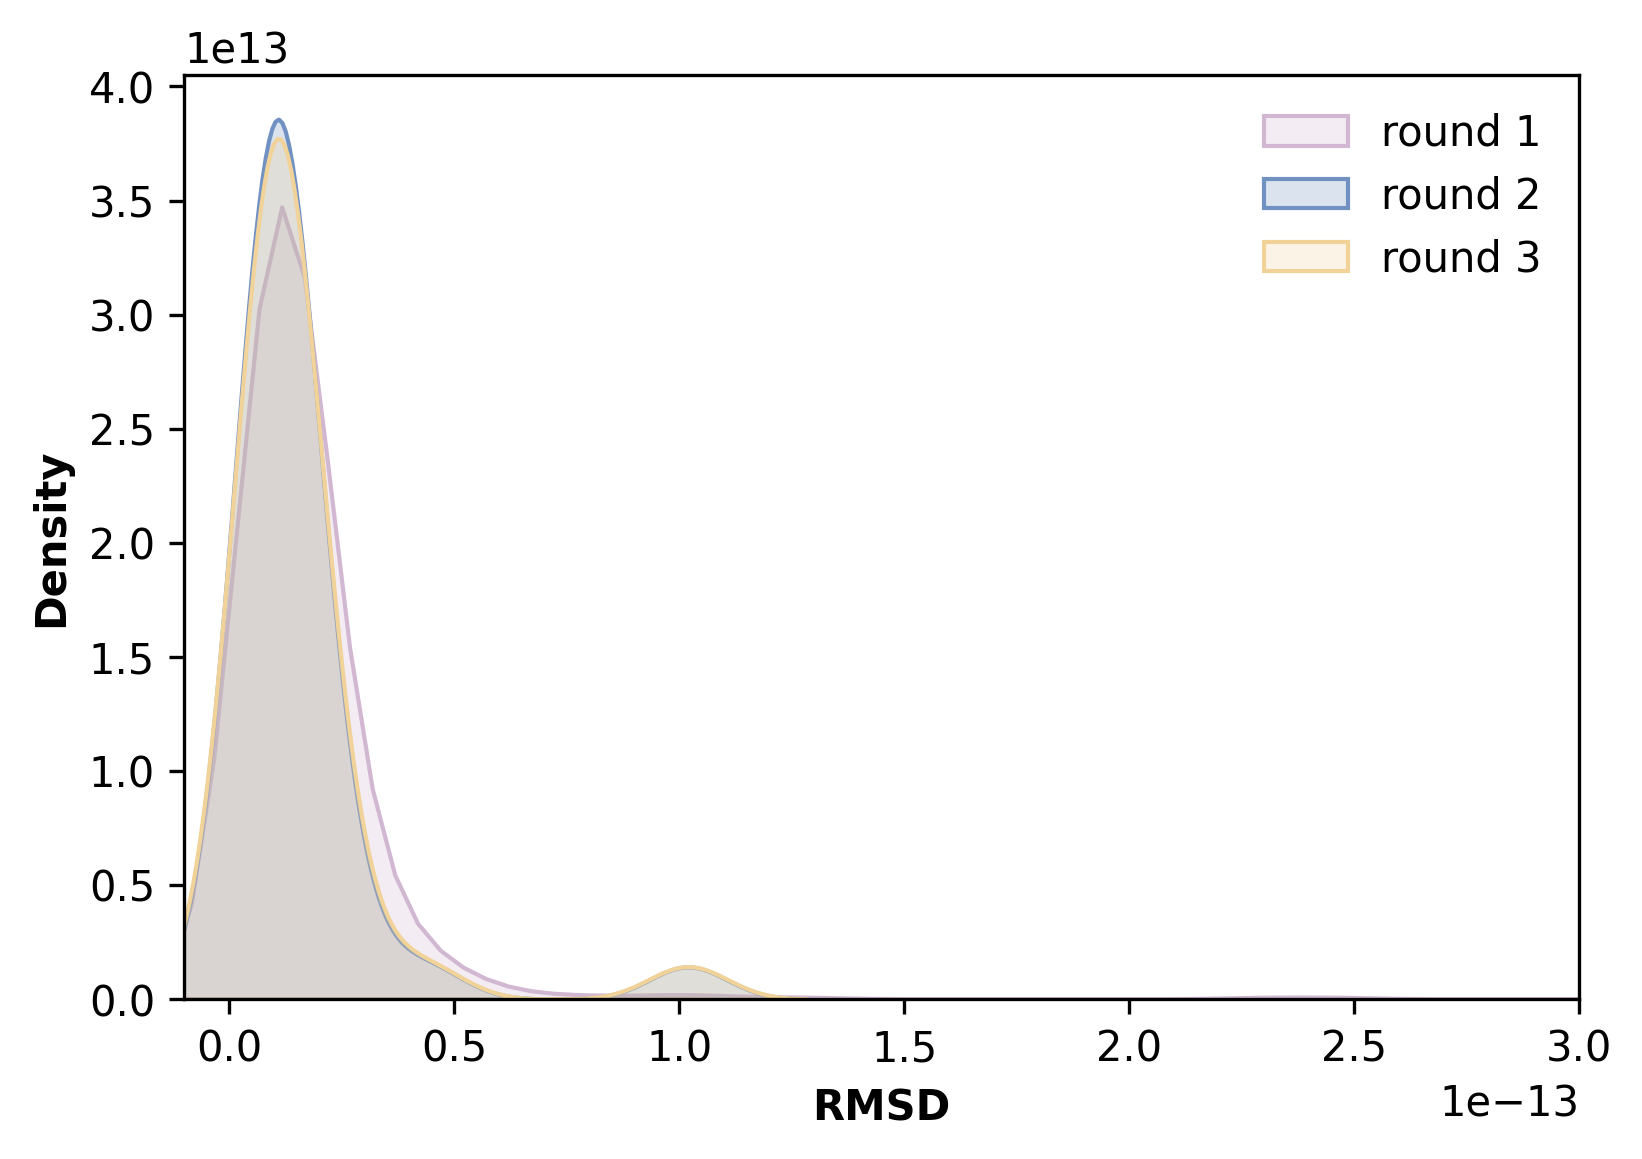

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
rmsd_file='../rmsd.txt'
rmsd_file_1='../rmsd_2.txt'
rmsd_file_2='../rmsd_3.txt'
rmsd = extract_similarity_scores(rmsd_file)
rmsd_2 = extract_similarity_scores(rmsd_file_1)
rmsd_3 = extract_similarity_scores(rmsd_file_2)
plt.figure(dpi=300,figsize=[6,4])

sns.kdeplot(rmsd,fill=True,label='round 1',color='#D2B7D2')
sns.kdeplot(rmsd_2,fill=True,label='round 2',color='#7291C3')
sns.kdeplot(rmsd_3,fill=True,label='round 3',color='#F1D39A')
plt.legend(frameon=False)
plt.xlim(-1e-14, 3e-13)
plt.xlabel('RMSD',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.show()